
# Computational Physics
## Physics 115 Homework 1
### Jesus Javier Serrano

### Question 1
Program is shown below. It's a pretty simple code that practices the print function of python

In [8]:
#Problem 1 focusing in printing commands of python

#a
print('Hello, World.')

#b
print('%.1e'%19000000000)
#-----------
phi = (((5)**0.5) - 1)/2
print('The value of the golden mean is %.8f'%phi)

Hello, World.
1.9e+10
The value of the golden mean is 0.61803399


### Question 2

2e) Working in a single float precision calculation, for the case of summing up decimal numbers where we start with the biggest valued term and then add all other terms in decreasing value, the system will reserve the majority of it's bits for the mantisa once we add smaller and smaller terms. However, in a 32-bit system, the addition of smaller terms will soon begin to reserve all bits for the mantisa up until the 32-bit threshold is reached. Once this happens, the system will begin rounding up the sum and thus nullify all terms with small value that will require more bits to be reserved to account for the difference in mantisa signature for the big-valued term in the beginning and the small value it needs to account for.
For the case where we sum up the terms beginning with the smallest value and adding all terms in increasing value, the system error is smaller in magnitude than the sum-up method. This is due to the fact that the small-valued terms already reserves the mantisa bits in the beginning and thus the difference in bits needed to account for the mantisa in each iteration of the sum doesn't differ significantly for the first few terms as compared to the summing up method.

In [27]:
import numpy as np
#Problem 2 focusing in numerical analysis and system error

#a

#working with functions are easier
#upward sum
def upwrd_sm(n):
    strt = 0
    for s in range(1,n+1):
        strt += 1/s
    return strt

#downward sum
def dnwrd_sm(n):
    strt = 0
    for s in range(1,n+1):
        v = (n+1) - s
        strt += 1/v
    return strt
#Double precision calculation


#b

for k in range(1,20):
    print('The N-th value is ',k)

    print('The upward sum method results in ' + str(upwrd_sm(k)))

    print('The downward sum method results in ' + str(dnwrd_sm(k)))

    uncrtnty = upwrd_sm(k) - dnwrd_sm(k)

    if uncrtnty == 0:
        print('Agree')
    else:
        print('%.5e'%uncrtnty)

print('End of Part b')
print('')
        
# The precision of this machine is consistent without any uncertainty for the first 14 cases. No significant error found

#c

#upward sum
def upwrd_sm1(n):
    strt = 0
    for s in range(1,n+1):
        strt = np.float32(strt + 1/s)
    return strt

#downward sum
def dnwrd_sm1(n):
    strt = 0
    for s in range(1,n+1):
        v = (n+1) - s
        strt = np.float32(strt + 1/v)
    return np.float32(strt)
#test cases
for p in range(2,8):
    k = 10**p
    print('The N-th value is ',k)

    print('The upward sum method results in ' + str(upwrd_sm1(k)))

    print('The downward sum method results in ' + str(dnwrd_sm1(k)))

    uncrtnty1 = upwrd_sm1(k) - dnwrd_sm1(k)

    if uncrtnty == 0:
        print('Agree')
    else:
        print('%.5e'%uncrtnty1)

print('End of Part c')
print('')
#The single float calculation method works out so slow and has significant error which explodes over a sum of 10^6 terms
#and the direction of uncertainty changes from having the upward sum be the maximum calculation to it being the minimum.

The N-th value is  1
The upward sum method results in 1.0
The downward sum method results in 1.0
Agree
The N-th value is  2
The upward sum method results in 1.5
The downward sum method results in 1.5
Agree
The N-th value is  3
The upward sum method results in 1.8333333333333333
The downward sum method results in 1.8333333333333333
Agree
The N-th value is  4
The upward sum method results in 2.083333333333333
The downward sum method results in 2.083333333333333
Agree
The N-th value is  5
The upward sum method results in 2.283333333333333
The downward sum method results in 2.283333333333333
Agree
The N-th value is  6
The upward sum method results in 2.4499999999999997
The downward sum method results in 2.45
-4.44089e-16
The N-th value is  7
The upward sum method results in 2.5928571428571425
The downward sum method results in 2.5928571428571425
Agree
The N-th value is  8
The upward sum method results in 2.7178571428571425
The downward sum method results in 2.7178571428571425
Agree
The N-t

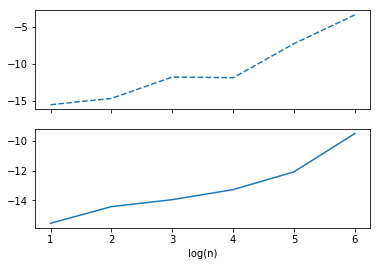

In [53]:
import numpy as np
import matplotlib.pyplot as plt

#Reference value
def ref(n):
    strt = 0
    for s in range(1,n+1):
        strt += 1/s
    return strt

#single float sum caclulations
def upwrd_sm1(n):
    strt = 0
    for s in range(1,n+1):
        strt = np.float32(strt + 1/s)
    return strt

#downward sum
def dnwrd_sm1(n):
    strt = 0
    for s in range(1,n+1):
        v = (n+1) - s
        strt = np.float32(strt + 1/v)
    return np.float32(strt)

n = np.linspace(1,6,6)
up_dif = np.array([])
dn_dif = np.array([])

for s in n:
    k = int(10**s)
    up_dif = np.append(up_dif,[abs(ref(k) - upwrd_sm1(k))])
    dn_dif = np.append(dn_dif,[abs(ref(k) - dnwrd_sm1(k))])

fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(n, np.log(up_dif), '--')
ax[1].plot(n, np.log(dn_dif),'-')
plt.xlabel('log(n)')
plt.show()

#Note that both plots are in logarithmic scale. Top plot(dotted) displays the magnitude of difference between the upward
#summation method and the double precision sum, the bottom plot portrays the magnitude of the difference between the 
#downward summation method and the double precision sum. The upward summation method has a greater increasing rate of 
#error than the downward summation where for the sum of the first one million integers, the upward summation differs 
#by a factor of 10^-5 from the double precision value compared to the downward summation method where it only
#differs by 10^-10.

 ### Question 3
 
 Program is how in Ipython notebook. 3d) For the recursion relation of $\psi$ we know that we may transform the relation into a quadratic equation. With the quadratic equation we may find two separate solutions by applying the quadratic formula where one of the solutions was already given, $\frac{\sqrt{5} - 1}{2}$, and the other solution $\bar{\psi}$ is:  $\frac{-\sqrt{5} - 1}{2}$. Note that $-(\bar{\psi} + 1) = \psi$. This means that the recursion relation may be rewritten as $\phi(n + 1) = (-1)^{n - 2}\phi(n-1) + \phi(n)$ where $\phi = 1 + \bar{\psi}$. This alternating recursion may blow up the values of $\psi$ towards the negative numbers, which seems evident for both double and single precision calculations.

In [59]:
#Problem 3
#part a: multiplicative exercise of psi
n = 50
sigma = (((5)**0.5) - 1)/2
sig_val = np.array([1])
for s in range(1,n+1):
    new_sig = sigma * sig_val[len(sig_val) - 1]
    sig_val = np.append(sig_val, new_sig)
    
print(sig_val)

#part b: recursion relation P[n + 1] = P[n - 1] - P[n]


psi = (((5)**0.5) - 1)/2
psi_val = np.array([1, psi])
for s in range(1,n+1):
    new_psi = psi_val[len(psi_val) - 2] - psi_val[len(psi_val) - 1]
    psi_val = np.append(psi_val, new_psi)
    
print(psi_val)

#part c, single and double precision


psi = (((5)**0.5) - 1)/2
psi_val1 = np.array([1, psi])
for s in range(1,n+1):
    new_psi1 = np.float32(psi_val1[len(psi_val1) - 2] - psi_val1[len(psi_val1) - 1])
    psi_val1 = np.append(psi_val1, new_psi1)
    
print(psi_val1)
# It seems that the recursion relation is unstable where for the double float precision there seems to be an increasing
#trend after the 45th recursion, and the single float precision calculation seems to explode upward in value after the ~35th
#recursion term.

[  1.00000000e+00   6.18033989e-01   3.81966011e-01   2.36067977e-01
   1.45898034e-01   9.01699437e-02   5.57280900e-02   3.44418537e-02
   2.12862363e-02   1.31556175e-02   8.13061876e-03   5.02499874e-03
   3.10562002e-03   1.91937873e-03   1.18624129e-03   7.33137436e-04
   4.53103854e-04   2.80033582e-04   1.73070272e-04   1.06963310e-04
   6.61069614e-05   4.08563490e-05   2.52506123e-05   1.56057367e-05
   9.64487568e-06   5.96086099e-06   3.68401469e-06   2.27684629e-06
   1.40716840e-06   8.69677897e-07   5.37490500e-07   3.32187398e-07
   2.05303102e-07   1.26884295e-07   7.84188071e-08   4.84654881e-08
   2.99533190e-08   1.85121692e-08   1.14411498e-08   7.07101942e-09
   4.37013034e-09   2.70088908e-09   1.66924125e-09   1.03164783e-09
   6.37593424e-10   3.94054407e-10   2.43539017e-10   1.50515390e-10
   9.30236269e-11   5.74917632e-11   3.55318637e-11]
[  1.00000000e+00   6.18033989e-01   3.81966011e-01   2.36067977e-01
   1.45898034e-01   9.01699437e-02   5.57280900e-0

## Question 4

The goal of this problem is to analyze the mid-point approximation of the second order derivative for a single-variable function $f(x)$. In order to define the mid-point approximation we must look into the definition of a derivative which uses limits and radius of convergence. To start off, let us define a midpoint $x$ with a radius of convergence $h$ spread around $x$ to create a domain of neighborhood points $[x-h, x+h ]$. Then we may define two sets of derivatives which we will denote as the left-handed derivative $f'(x)_-$ and the right-handed derivative $f'(x)_+$:
$$f'(x)_- = \lim_{h \rightarrow 0} \frac{f(x) - f(x - h)}{h}$$
$$f'(x)_+ = \lim_{h \rightarrow 0} \frac{f(x+ h) - f(x)}{h}$$

<img src="Figures/def_derivative.png" width="45%">

In the image above both types of derivatives are represented graphically where the light blue line represents the function $y(x') = (x' - x)f'(x)_+ + y(x)$ and the purple line represents the function $y(x') = (x' - (x - h))f'(x)_- + y(x-h)$. The radius of convergence is illustrated as the radius $h$ of the blue circle centered at $x$.  Note that in this case $f'(x)_+$ is very closely approximated as $\frac{f(x+ h) - f(x)}{h} = \frac{\triangle f(x)}{h}$ and $f'(x)_- \approx \frac{f(x) - f(x- h)}{h} = \frac{\triangle f(x-h)}{h}$.

With the following derivative formulas we may define the second-order derivative of the function at $x$ by defining $x$ as a midpoint. Thus the second-order derivative is defined as the rate of change between the left-handed and right-handed derivatives such that:
$$f_{\text{mid}}(x) = \lim_{h \rightarrow 0} \frac{f'(x)_+ - f'(x)_-}{h} = \lim_{h \rightarrow 0} \frac{(f(x+ h) - f(x) )- (f(x) - f(x - h) )}{h^2} = \lim_{h \rightarrow 0} \frac{f(x+ h) + f(x - h) - 2f(x)}{h^2}$$

An approximation to the mid-point second-order derivative can be estimated by ignoring the limit:
$$f_{\text{mid}}(x) \approx  \frac{f(x+ h) + f(x - h) - 2f(x)}{h^2}$$

With the approximation defined, a minimum bound to the estimate error of the second order derivative may be calculated as follows:

First let us expand each function with it's Taylor series: $f(x + h) = f(x) + h \frac{f'(X)}{1!} + h^2 \frac{f''(x)}{2!} + \dots$

Next, the mid-point second-order approximation is redifined in terms of $f(x)$ and $h$:
$$f_{\text{mid}}(x) \approx  \frac{(f(x) + h \frac{f'(X)}{1!} + h^2 \frac{f''(x)}{2!} + \dots) + (f(x) - h \frac{f'(X)}{1!} + h^2 \frac{f''(x)}{2!} + \dots) - 2f(x)}{h^2}$$

The approximation is simplified to be:
$$f_{\text{mid}}(x) \approx  f''(x) + 2 h^2\sum_{h = 0}^{\infty} h^{2n} \frac{f^{2(n + 2)}(x)}{(2(n+2))!} = f_{\text{mid approx}}(x)$$

With the approximation expanded, the error calculation can now be estimated as such:

$$ \text{Error} := f_{\text{mid approx}}(x) - f''(x) = 2 h^2\sum_{h = 0}^{\infty} h^{2n} \frac{f^{2(n + 2)}(x)}{(2(n+2))!}$$

This estimate proves the error to be bounded with an asymptotic function of:
$$f_{\text{mid approx}}(x) - f''(x) = \mathcal{O}(h^2)$$
Note that the function is dependent on the square of the radius of convergence.

The following plots are calculated for the monomial function $f(x) = x^{4.0}$


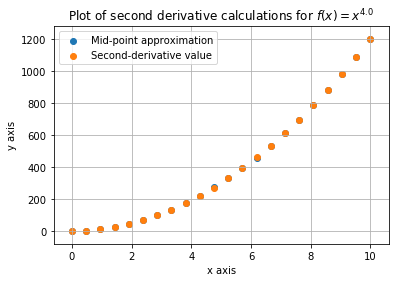

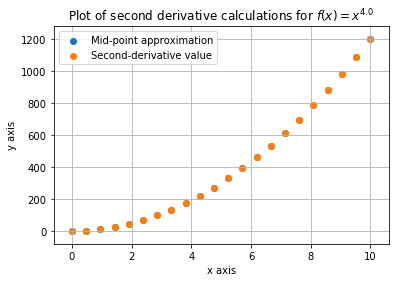

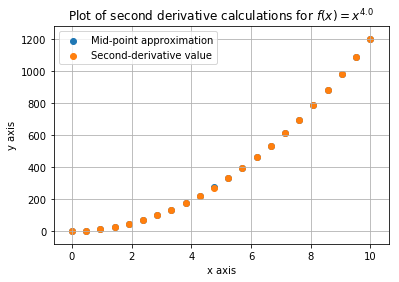

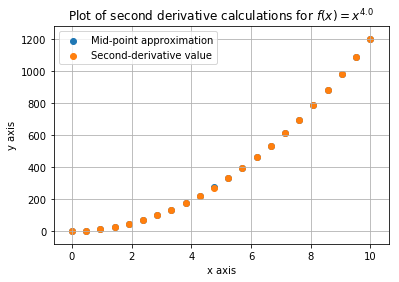

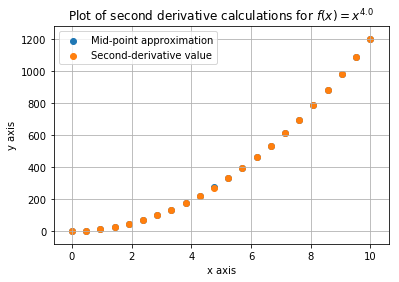

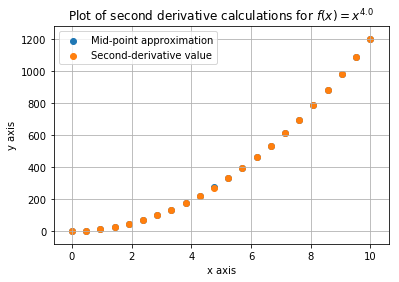

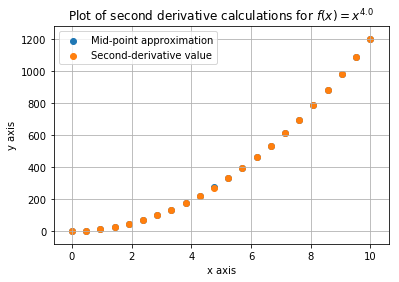

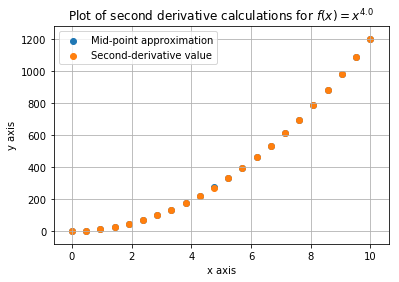

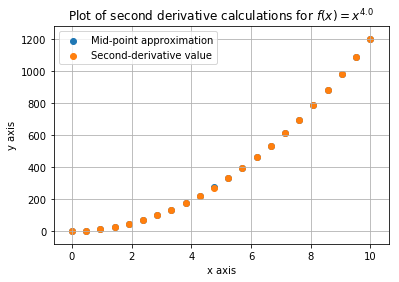

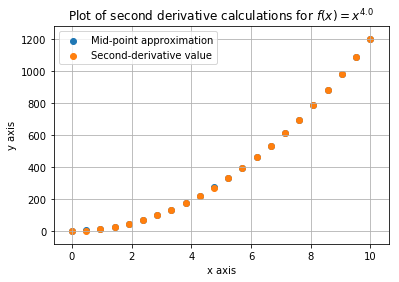

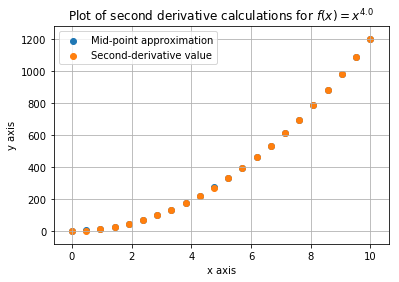

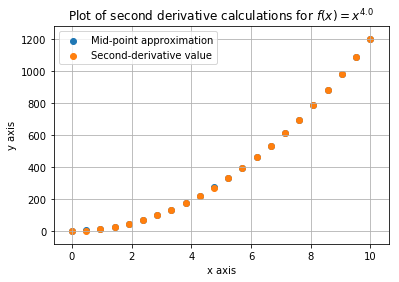

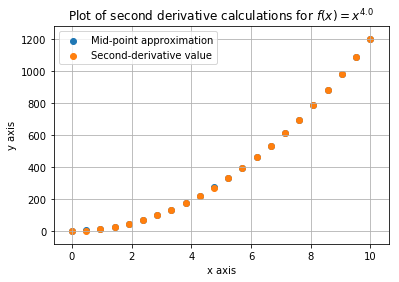

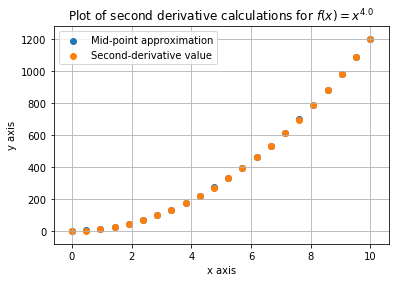

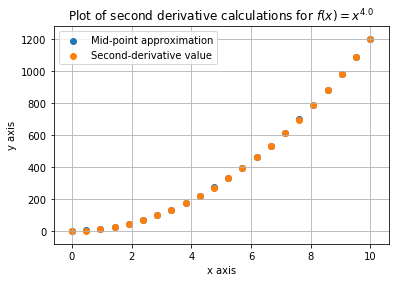

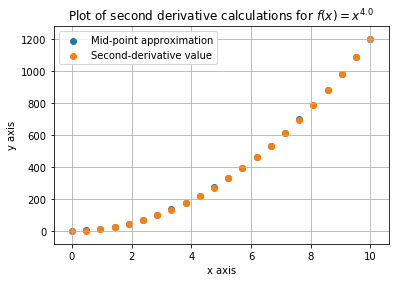

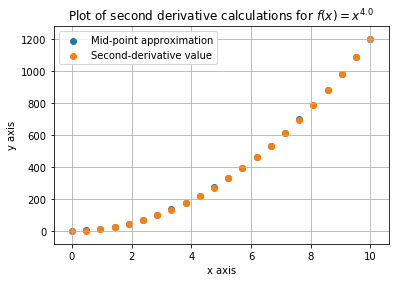

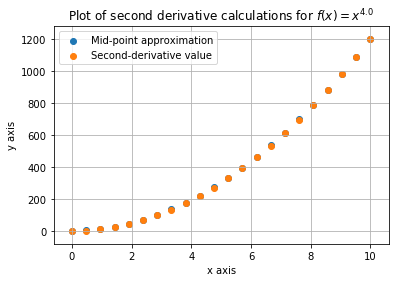

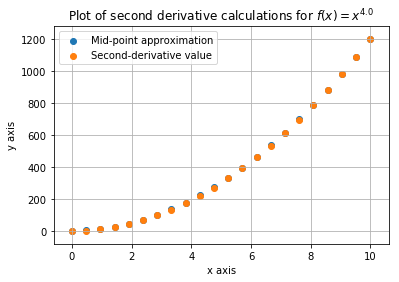

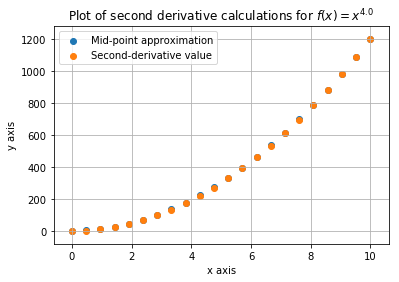

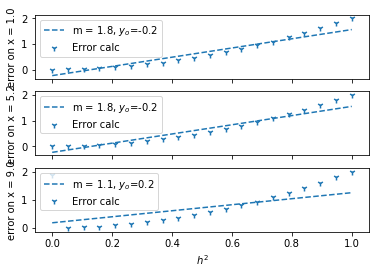

Error analysis done for the monomial function $f(x) = x^{4.0}$
The following plots are calculated for the monomial function $f(x) = x^{5.0}$


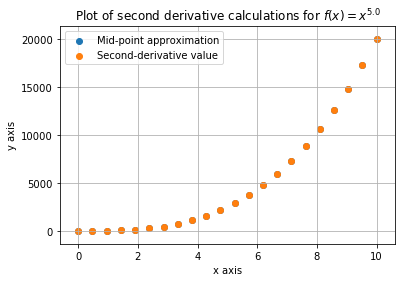

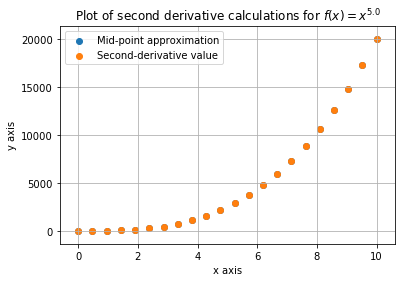

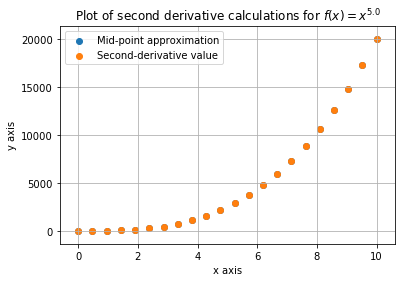

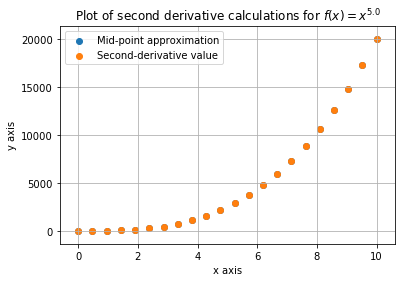

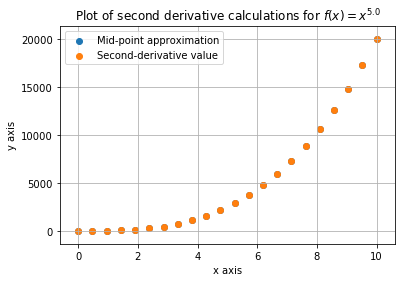

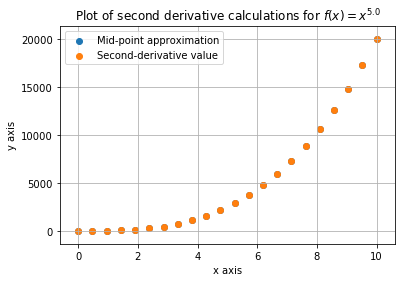

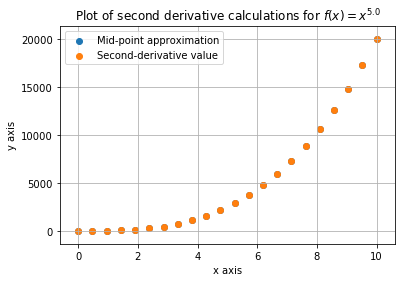

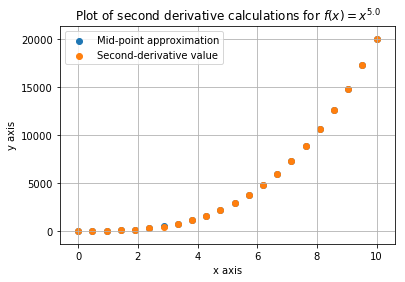

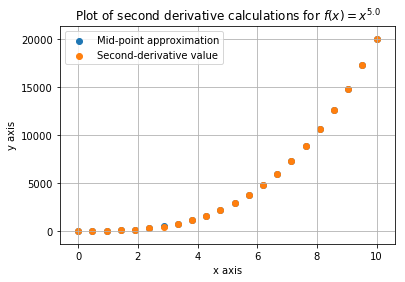

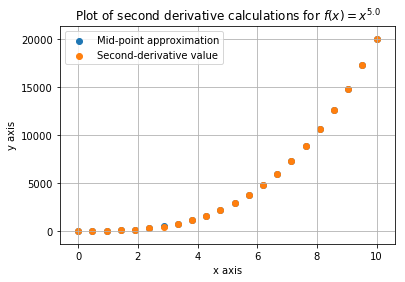

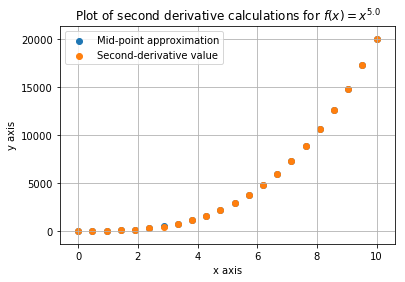

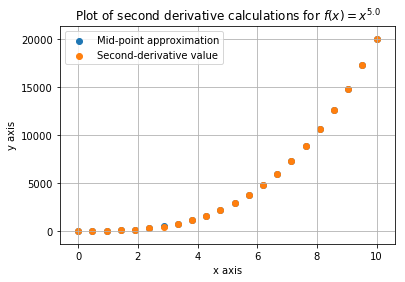

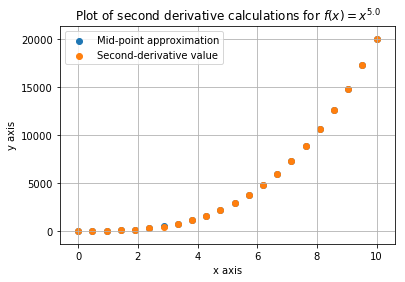

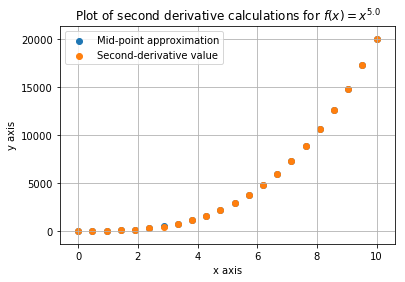

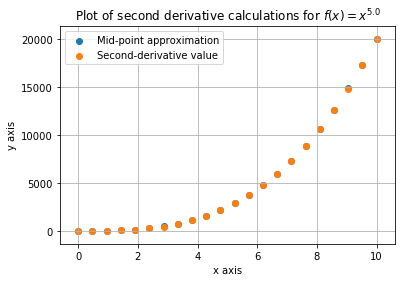

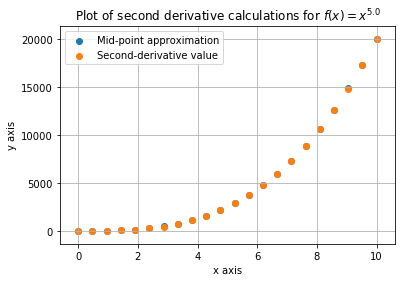

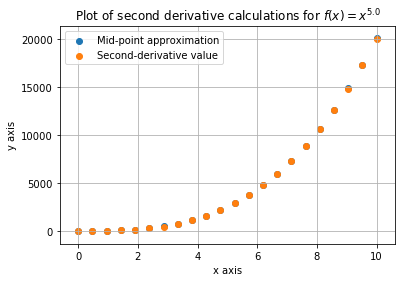

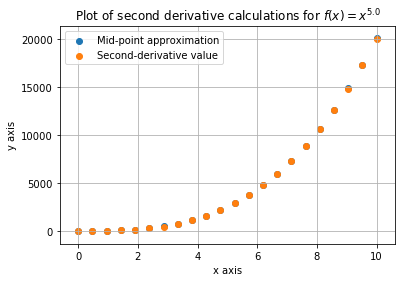

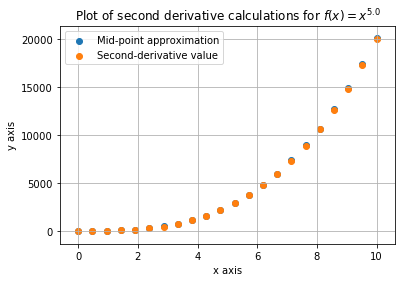

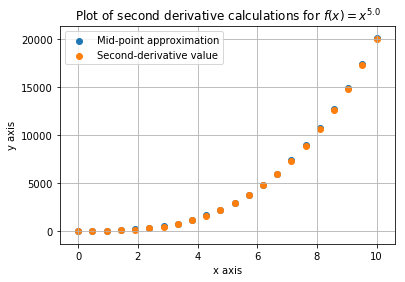

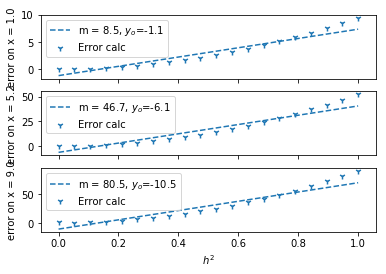

Error analysis done for the monomial function $f(x) = x^{5.0}$
The following plots are calculated for the monomial function $f(x) = x^{6.0}$


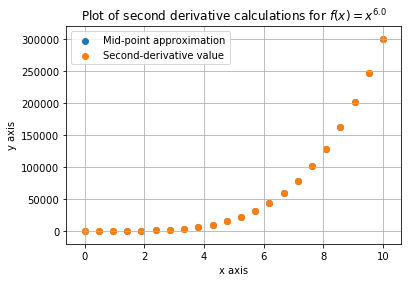

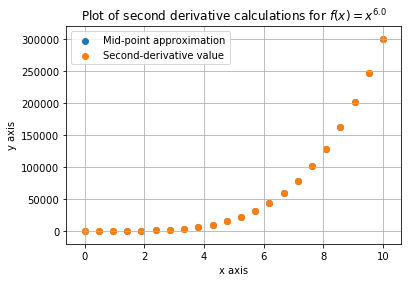

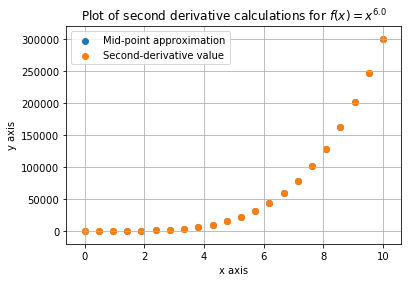

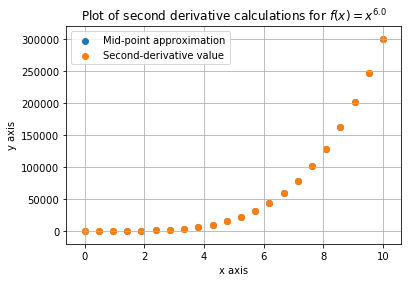

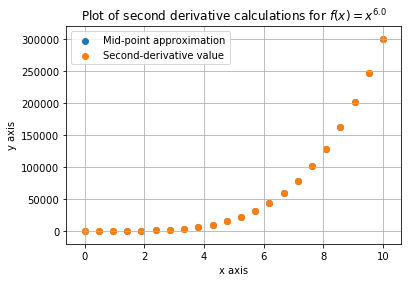

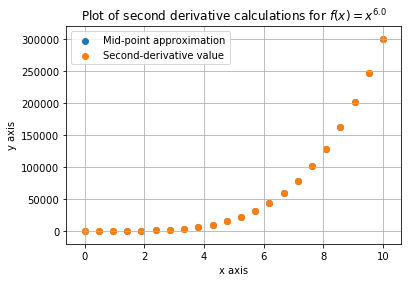

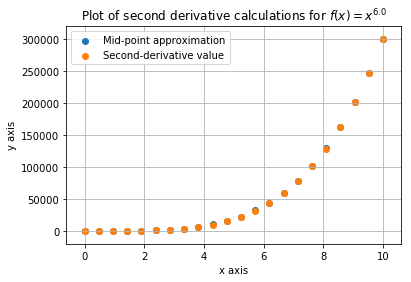

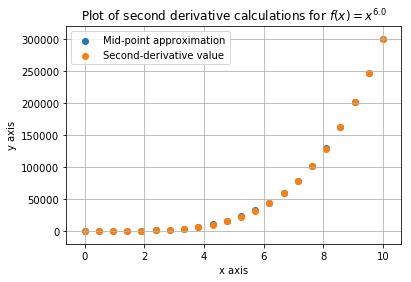

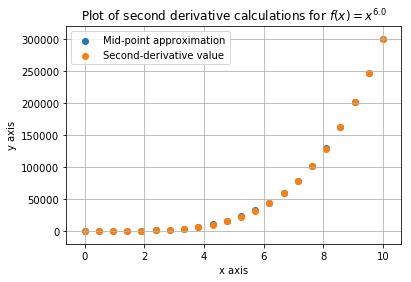

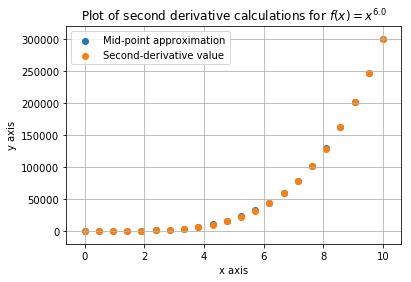

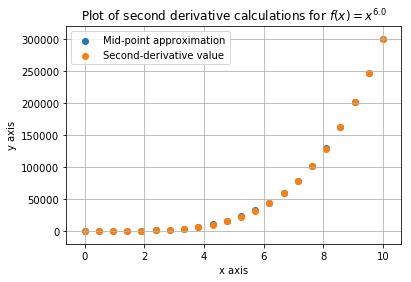

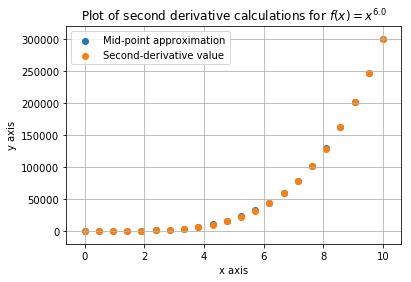

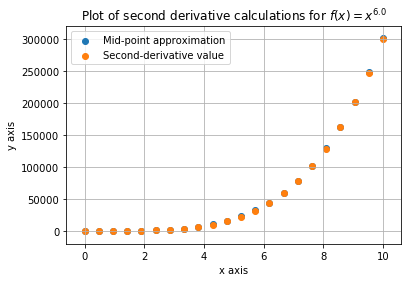

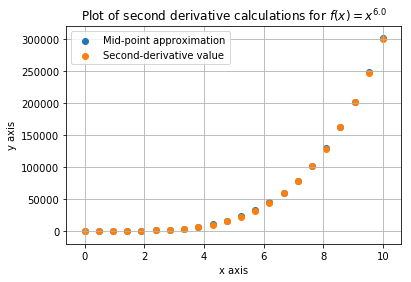

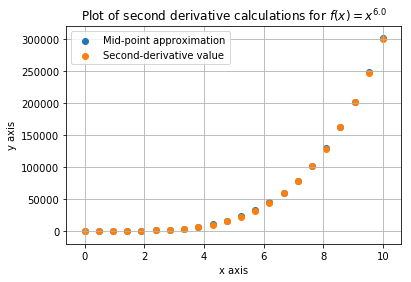

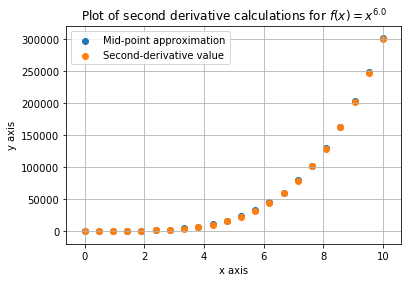

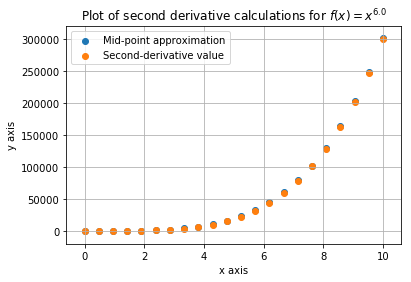

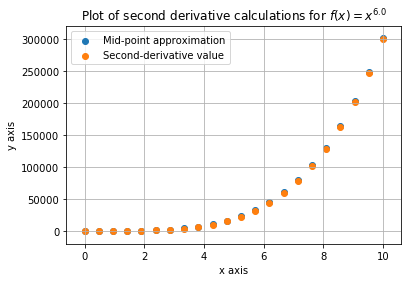

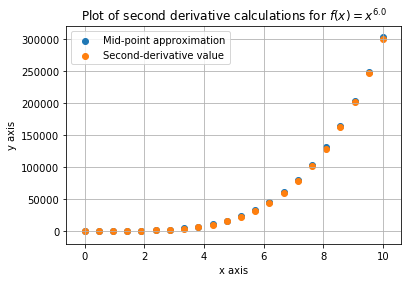

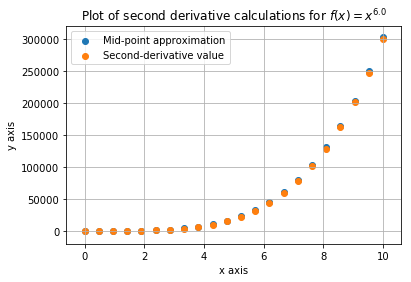

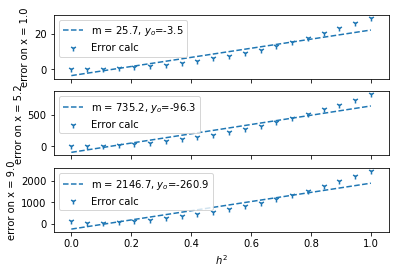

Error analysis done for the monomial function $f(x) = x^{6.0}$
The following plots are calculated for the monomial function $f(x) = x^{7.0}$


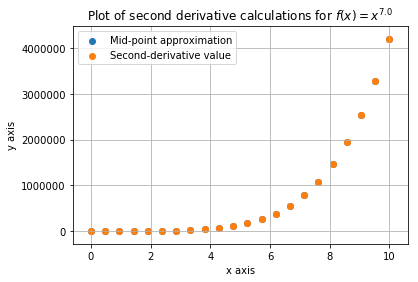

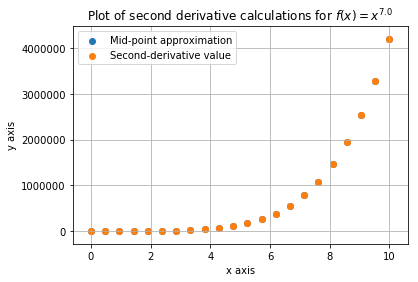

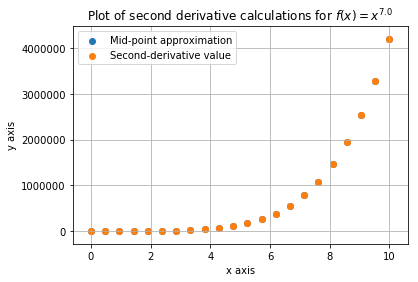

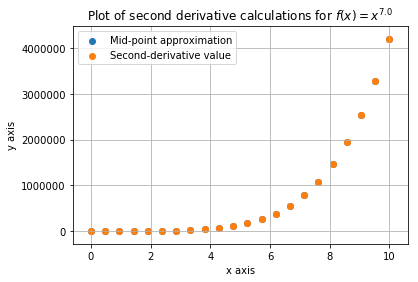

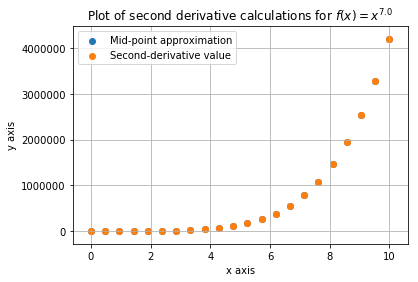

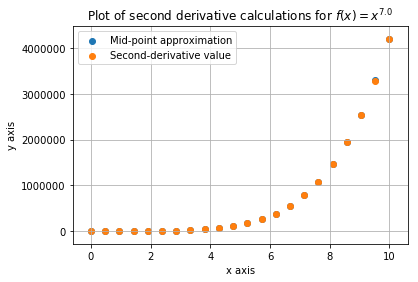

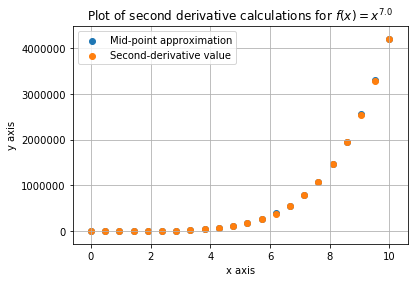

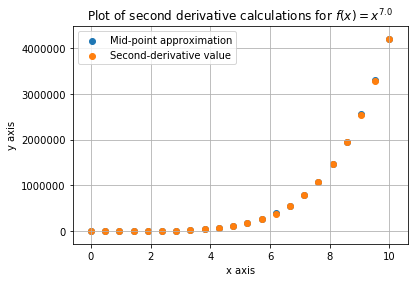

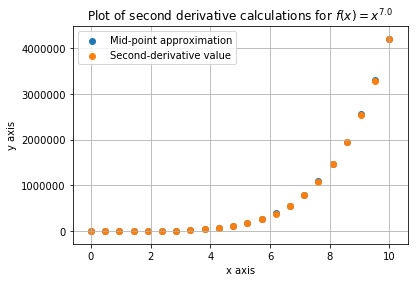

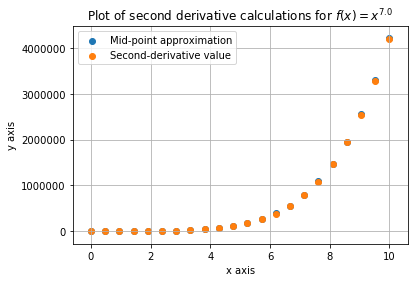

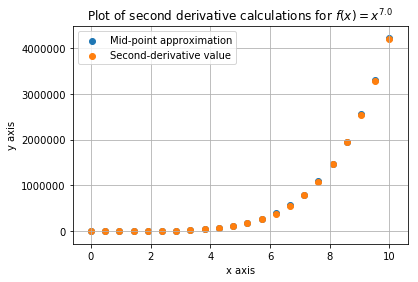

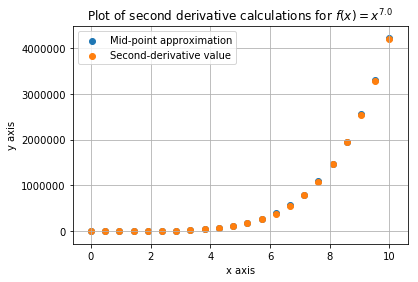

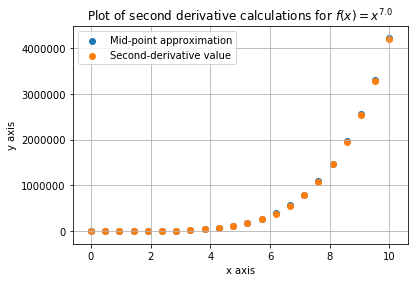

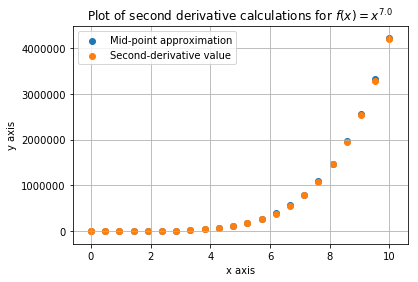

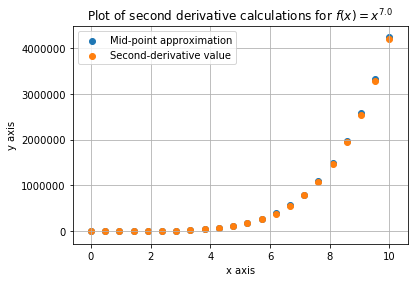

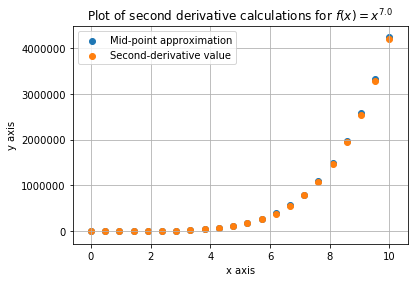

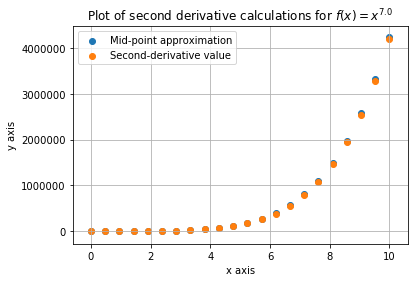

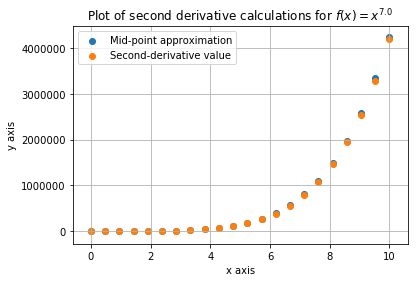

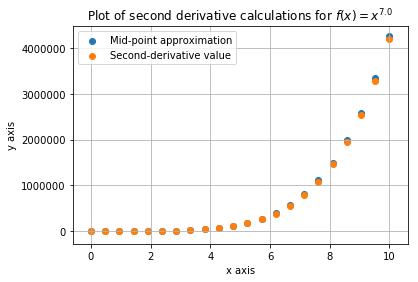

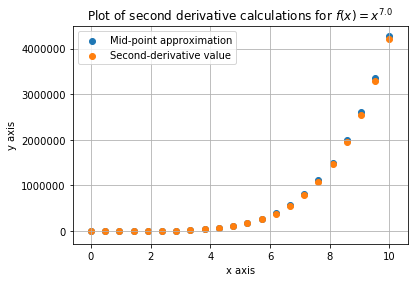

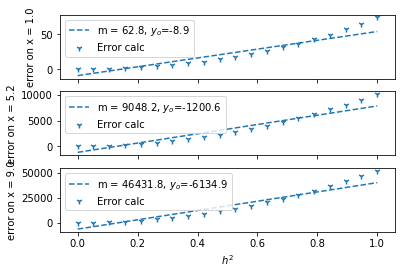

Error analysis done for the monomial function $f(x) = x^{7.0}$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds

# define the mid-point second-order derivative approximation
    
def sec_mid(h, f, x):
    frst_term = f(x + h)
    scnd_term = f(x-h)
    mid_term = 2*f(x)
    delta_delta_f = frst_term + scnd_term - mid_term
    return delta_delta_f/(h**2)

# define a universal function. In this case let us use the monomial of order n

def univ_fctn(x, n):
    return x**n

# let's use the true definition of the second-order derivative to find the true value of f''(x)

def univ_sec_order(x, n):
    return n*(n-1)*(x**(n - 2))

#define our simple error calculator

def error_est(est, tru):
    return abs(est - tru)

# we will work in a sample interval of [0, 10]
x_int = np.linspace(0, 10, 22)

#the radius of convergence space we will analyze is [1E-6, 1]
h_opt = np.linspace(1E-6, 1, 20)

#the number of different functions we will analyze:
n_opt = np.linspace(4, 7, 4)

for pwr in n_opt:
    print(r'The following plots are calculated for the monomial function $f(x) = x^{%.1f}$'%pwr)
    funct = univ_fctn(x_int, pwr)
    def chosen_funct(x):
        n = pwr
        return univ_fctn(x, n)
    sec_deriv = univ_sec_order(x_int, pwr)
    width_val = np.array([])
    error_strt = np.array([])
    error_mid = np.array([])
    error_end = np.array([])
    for width in h_opt:
        #width = 10**width_log
        approx_sec_deriv = sec_mid(width, chosen_funct, x_int)
        plt.scatter(x_int, approx_sec_deriv, label='Mid-point approximation')
        plt.scatter(x_int, sec_deriv, label = 'Second-derivative value')
        plt.xlabel('x axis')
        plt.ylabel('y axis')
        plt.grid(True)
        plt.title(r'Plot of second derivative calculations for $f(x) = x^{%.1f}$'%pwr)
        plt.legend()
        plt.show()
        error_calc = error_est(approx_sec_deriv, sec_deriv)
        width_val = np.append(width_val, [width])
        error_strt = np.append(error_strt, [error_calc[2]])
        error_mid = np.append(error_mid, [error_calc[int(len(error_calc)/2)]])
        error_end = np.append(error_end, [error_calc[int(len(error_calc) - 3)]])

    #our linear-fit algorithm
    def lin_fit(x_data, y_data, y_error):
            #Expectation value of the nth-power of the x-array weighted by the inverse of the y-variance
        def u(x, sig, n):
            tp = x**n
            bt = sig**2
            ary = tp/bt
            return np.sum(ary)

        #Expectation value of the inner product between the the nth-power of the x-array and the y-array weighted by the inverse of the y-variance
        def w(x, y, sig, n):
            tp = y*(x**n)
            bt = sig**2
            ary = tp/bt
            return np.sum(ary)

        #Linear-fit algorithm using least-squares method
        def linfit(x_data, y_data, y_error):
            u_0 = u(x_data, y_error, 0)
            u_1 = u(x_data, y_error, 1)
            u_2 = u(x_data, y_error, 2)

            w_0 = w(x_data, y_data, y_error, 0)
            w_1 = w(x_data, y_data, y_error, 1)
            w_2 = w(x_data, y_data, y_error, 2)

            D = (u_0 * u_2) - (u_1 ** 2)
            stnd_1 = (u_0 * w_1) - (w_0 * u_1)
            stnd_2 = (u_2 * w_0) - (w_1 * u_1)

            slope = stnd_1/D
            var_sl = u_0/D

            y_intr = stnd_2/D
            var_yt = u_2/D

            return np.array([slope, y_intr, var_sl, var_yt])

        return linfit(x_data, y_data, y_error)


    width_val = pre_width_val**2
    y_error = width_val**2 + np.repeat(1, len(width_val))

    error_fit1 = lin_fit(width_val, error_strt, (y_error*2))
    error_fit2 = lin_fit(width_val, error_mid, (y_error*2))
    error_fit3 = lin_fit(width_val, error_end, (y_error*2))

    def error_strt_lin(ar, x):
        return ar[1] + x*ar[0]

    y1 = error_strt_lin(error_fit1, width_val)
    y2 = error_strt_lin(error_fit2, width_val)
    y3 = error_strt_lin(error_fit3, width_val)

    ax1 = plt.subplot(311)
    plt.scatter(width_val, error_strt, marker = "1", label = 'Error calc')
    plt.plot(width_val, y1, '--', label = r'm = %.1f, $y_o$=%.1f'%(error_fit1[0], error_fit1[1]))
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.legend()
    plt.ylabel('error on x = %.1f'%x_int[2])


    ax2 = plt.subplot(312, sharex=ax1)
    plt.scatter(width_val, error_mid, marker = "1", label = 'Error calc')
    plt.plot(width_val, y2, '--', label = r'm = %.1f, $y_o$=%.1f'%(error_fit2[0], error_fit2[1]))
    plt.ylabel('error on x = %.1f'%x_int[int(len(error_calc)/2)])
    plt.legend()
    # make these tick labels invisible
    plt.setp(ax2.get_xticklabels(), visible=False)


    ax3 = plt.subplot(313, sharex=ax1)
    plt.scatter(width_val, error_end, marker = "1", label = 'Error calc')
    plt.plot(width_val, y3, '--', label = r'm = %.1f, $y_o$=%.1f'%(error_fit3[0], error_fit3[1]))
    plt.xlabel(r'$h^2$')
    plt.ylabel('error on x = %.1f'%x_int[int(len(error_calc) - 3)])
    plt.legend()
    plt.show()
    
    print(r'Error analysis done for the monomial function $f(x) = x^{%.1f}$'%pwr)
    
    
        


The algorithm above went through several different monomial functions, each with different midpoints used to conduct the error analysis, and for each analysis a seperate different radius of convergence was used. This results in a beautiful mirage of data sets containing information of the nature of the midpoint approximation, which can be compiled and analyzed more closely. A clearer picture can be illustrated by using a fit-funciton algorithm to calculate the second-order polynomial that determines the error function for our approximation.

Let us first observe the fits for the monomial function $f(x) = x^6$ at three different mid-points.

The following plots are calculated for the monomial function $f(x) = x^{6}$


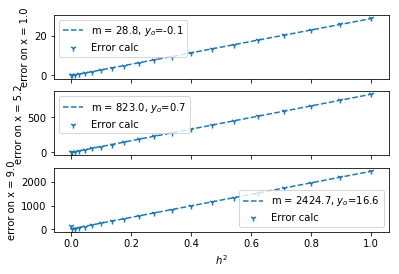

Error analysis done for the monomial function $f(x) = x^{6}$


In [67]:
#copy down the algorithm used above for the error analysis


# we will work in a sample interval of [0, 10]
x_int = np.linspace(0, 10, 22)

#the radius of convergence space we will analyze is [1E-6, 1]
h_opt = np.linspace(1E-6, 1, 20)

print(r'The following plots are calculated for the monomial function $f(x) = x^{6}$')
pwr = 6
funct = univ_fctn(x_int, pwr)
def chosen_funct(x):
    n = pwr
    return univ_fctn(x, n)

sec_deriv = univ_sec_order(x_int, pwr)
pre_width_val = np.array([])
error_strt = np.array([])
error_mid = np.array([])
error_end = np.array([])
for width in h_opt:
    #width = 10**width_log
    approx_sec_deriv = sec_mid(width, chosen_funct, x_int)
    error_calc = error_est(approx_sec_deriv, sec_deriv)
    pre_width_val = np.append(pre_width_val, [width])
    error_strt = np.append(error_strt, [error_calc[2]])
    error_mid = np.append(error_mid, [error_calc[int(len(error_calc)/2)]])
    error_end = np.append(error_end, [error_calc[int(len(error_calc) - 3)]])

    

#our linear-fit algorithm
def lin_fit(x_data, y_data, y_error):
        #Expectation value of the nth-power of the x-array weighted by the inverse of the y-variance
    def u(x, sig, n):
        tp = x**n
        bt = sig**2
        ary = tp/bt
        return np.sum(ary)

    #Expectation value of the inner product between the the nth-power of the x-array and the y-array weighted by the inverse of the y-variance
    def w(x, y, sig, n):
        tp = y*(x**n)
        bt = sig**2
        ary = tp/bt
        return np.sum(ary)

    #Linear-fit algorithm using least-squares method
    def linfit(x_data, y_data, y_error):
        u_0 = u(x_data, y_error, 0)
        u_1 = u(x_data, y_error, 1)
        u_2 = u(x_data, y_error, 2)

        w_0 = w(x_data, y_data, y_error, 0)
        w_1 = w(x_data, y_data, y_error, 1)
        w_2 = w(x_data, y_data, y_error, 2)

        D = (u_0 * u_2) - (u_1 ** 2)
        stnd_1 = (u_0 * w_1) - (w_0 * u_1)
        stnd_2 = (u_2 * w_0) - (w_1 * u_1)

        slope = stnd_1/D
        var_sl = u_0/D

        y_intr = stnd_2/D
        var_yt = u_2/D

        return np.array([slope, y_intr, var_sl, var_yt])
    
    return linfit(x_data, y_data, y_error)


width_val = pre_width_val**2
#an uncertainty, marked as y_error, is added here to account for the remainder of the error function
#between the mid_point approximation and the actual second derivative
y_error = width_val**2 + np.repeat(1, len(width_val))

error_fit1 = lin_fit(width_val, error_strt, (y_error*2))
error_fit2 = lin_fit(width_val, error_mid, (y_error*2))
error_fit3 = lin_fit(width_val, error_end, (y_error*2))

def error_strt_lin(ar, x):
    return ar[1] + x*ar[0]

y1 = error_strt_lin(error_fit1, width_val)
y2 = error_strt_lin(error_fit2, width_val)
y3 = error_strt_lin(error_fit3, width_val)

ax1 = plt.subplot(311)
plt.scatter(width_val, error_strt, marker = "1", label = 'Error calc')
plt.plot(width_val, y1, '--', label = r'm = %.1f, $y_o$=%.1f'%(error_fit1[0], error_fit1[1]))
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend()
plt.ylabel('error on x = %.1f'%x_int[2])


ax2 = plt.subplot(312, sharex=ax1)
plt.scatter(width_val, error_mid, marker = "1", label = 'Error calc')
plt.plot(width_val, y2, '--', label = r'm = %.1f, $y_o$=%.1f'%(error_fit2[0], error_fit2[1]))
plt.ylabel('error on x = %.1f'%x_int[int(len(error_calc)/2)])
plt.legend()
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)


ax3 = plt.subplot(313, sharex=ax1)
plt.scatter(width_val, error_end, marker = "1", label = 'Error calc')
plt.plot(width_val, y3, '--', label = r'm = %.1f, $y_o$=%.1f'%(error_fit3[0], error_fit3[1]))
plt.xlabel(r'$h^2$')
plt.ylabel('error on x = %.1f'%x_int[int(len(error_calc) - 3)])
plt.legend()
plt.show()

print('Error analysis done for the monomial function f(x) = x^(6)')

With the following three sample plots it is tempting to conclude that there is a sqaure relation between the slope of the linear fit and the mid-point used. Further analysis can be done to prove indeed that $f_{\text{mid}} (x) \propto x^2$. A large sample of monomial functions will illustrate a more general relaiton where $f_{\text{mid}} (x) \propto x^{n - 4}$ and this is due to the fact that any function can be precisely approximated within a radius of convergence with a Taylor polynomial. We have already proved that the error function used to analyze the approximation is a Taylor polynomial, whose remainder can be proven to be bounded by $R(\text{Error}) \leq 2 \binom{n}{4} x^{n - 4}$ for a monomial funciton with degree n. Thus, we can inductively hypothesize that this second-order approximation is strictly proportional to $h^2$ for all functions according to Lagrange's Remainder Theorem and the fact that any funciton can be transformed into a Taylor series as long as the mid-point acts as the point of convergence for the Taylor series.